Some checks for the eigenvalue problem
----------------------------------------
Everything is ok with orthogonality
Everything is ok with normalization
Eigenvalue problem is satisfied
Some checks for the eigenvalue problem
----------------------------------------
Everything is ok with orthogonality
Everything is ok with normalization
Eigenvalue problem is satisfied
----------------------------------------
Degeneracy:
First way:Negative
Second way:Negative


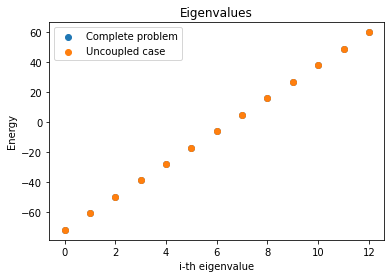

Second way:Negative
----------------------------------------
Now we have to relate the ith eigenvalue with the number of bosons
Energy is decreasing, must flip both eigenvectors and eigenvalues


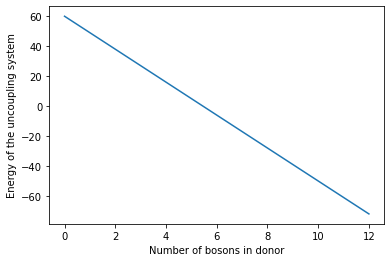

----------------------------------------
Sum of probs ok with Pertubation


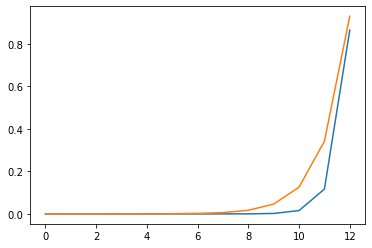

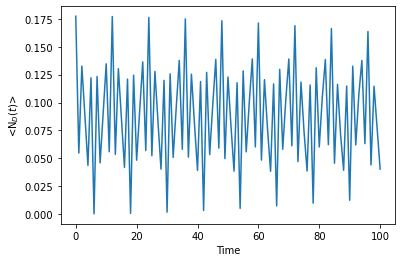

In [3]:
import math
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=np.ComplexWarning)
from numpy import dtype, linalg
from scipy.linalg import expm
import matplotlib.pyplot as plt

import scipy

# Those are some functions I will use later to verify various results
def verify_orthogonality(eigenvecs):
    count = 0
    for i in range(eigenvecs.shape[0]):
        for j in range(eigenvecs.shape[1]):
            if i != j:  # Otherwise must be 1
                prod = np.vdot(eigenvecs[:, i], eigenvecs[:, j])
                if (abs(prod) > math.pow(10, -7)): count += 1

    if count == 0:
        print('Everything is ok with orthogonality')
    else:
        print('There is a problem with orthogonality')


# Check for unit length eigenvectors
def verify_normalization(eigenvecs):
    count = 0
    for i in range(eigenvecs.shape[0]):
        if abs(linalg.norm(eigenvecs[:, i]) - 1) > math.pow(10, -7): count += 1

    if count == 0:
        print('Everything is ok with normalization')
    else:
        print('There is a problem with normalization')


# Check if eigenvalue problem is satisfied
def verify_eigenvalue_problem(A, eigenvecs, eigenvals):
    count = 0
    for i in range(len(A)):
        calculation = np.matmul(A, eigenvecs[:, i]) - eigenvals[i] * eigenvecs[:, i]
        indeces = np.where(abs(calculation) > math.pow(10, -7))
        if not indeces:  # Check if the array is empty
            count += 1
    if count == 0:
        print('Eigenvalue problem is satisfied')
    else:
        print('There is a problem with Eigenvalue problem')


def run_checks(Hamiltonian):
    print('Some checks for the eigenvalue problem\n' + '-'*40)
    # d-> eigenvalues, Z- >eigenvectors
    d, Z = linalg.eigh(Hamiltonian)

    # Run some checks
    verify_orthogonality(Z)
    verify_normalization(Z)
    verify_eigenvalue_problem(Hamiltonian, Z, d)
    return d, Z


#https://www.kite.com/python/answers/how-to-check-for-duplicates-in-a-list-in-python
def check_degeneracy(eigenvals):
    print('-'*40+'\nDegeneracy:')
    if((len(eigenvals) == len(set(eigenvals))) ==True): print('First way:Negative')
    else: print('First way:Positive')

def check_degeneracy_second_way():
  #Case 1
  if chiA + chiD != 0:
    #Case 1.1
    if chiA + chiD > 0:
      #Case 1.1.1
      if( (omegaA-omegaD)/N >=-chiA and (omegaA-omegaD)/N <= chiD ): 
        print('Second way:Positive')
        return '1.1.1'
      #Case 1.1.2
      else: 
        print('Second way:Negative')
        return '1.1.2'
    #Case 1.2
    if chiA + chiD < 0:
      #Case 1.2.1
      if( (omegaA-omegaD)/N <=-chiA and (omegaA-omegaD)/N >= chiD ): 
        print('Second way:Positive')
        return '1.2.1'
      #Case 1.2.2
      else: 
        print('Second way:Negative')
        return '1.2.2'

  #Case 2
  else:
    #Case 2.1
    if (omegaD-omegaA-chiA*N >0 or omegaD-omegaA-chiA*N <0): 
      print('Second way:Negative')
      return '2.1'
    #Case 2.2
    else: 
      print('Second way:Energy is constant,Positive')
      return '2.2'

# To ensure that the first column corresponds to the case with 0 bosons at the donor

def check_probs(array,case):
    print('-' * 40)
    if (abs(np.sum(array) - 1) < math.pow(10, -7)): print('Sum of probs ok with ' + case)
    else:
        print('Probelm with the sum of probs with ' + case)
        print(np.sum(array))

N=12
omegaA = 2
omegaD = -3
chiA = 0.5
chiD = -0.5
coupling_lambda = 0.001

# ----------- Step 1: Construct the Hamiltonian matrix of the problem -----------

# Step 1a) Complete problem
H = np.zeros((N + 1, N + 1), dtype=float)

# Pointer m points to rows and n to columns. It is constructed based on the basis of the uncoupling problem
for m in range(N + 1):
    for n in range(N + 1):
        # First term from interaction
        if m == n + 1:
            H[m][n] = -coupling_lambda * np.sqrt((n + 1) * (N - n))
        # Second term from interaction
        if m == n - 1:
            H[m][n] = -coupling_lambda * np.sqrt(n * (N - n + 1))
        # Term coming from the two independent Hamiltonians
        if m == n:
            H[m][n] = omegaD * m + 0.5 * chiD * m ** 2 + omegaA * (N - m) + 0.5 * chiA * (N - m) ** 2

# Step 1b) Uncoupled case
H_uncoupling = np.zeros((N + 1, N + 1), dtype=float)
for m in range(N + 1):
    for n in range(N + 1):
        # Term coming from the two independent Hamiltonians
        if m == n:  H_uncoupling[m][n] = omegaD * m + 0.5 * chiD * m ** 2 + omegaA * (N - m) + 0.5 * chiA * (N - m) ** 2

# ----------- Step 2: Solve the eigenvalue problem -----------
eigenvalues, eigenvectors = run_checks(H)
#Diagonal matrix. Easy to compute eigenvalues
eigenvalues_uncoupling, eigenvectors_uncoupling = run_checks(H_uncoupling)

#Check if degeneracy
check_degeneracy(eigenvalues_uncoupling)
check_degeneracy_second_way()

#Make an indicative plot
Ns = np.linspace(0, N, num=N + 1, dtype=int)
plt.scatter(Ns, eigenvalues, label='Complete problem')
plt.scatter(Ns, eigenvalues_uncoupling, label='Uncoupled case')
plt.xlabel('i-th eigenvalue')
plt.ylabel('Energy')
plt.legend()
plt.title('Eigenvalues')
plt.show()

#Our theory applies only to the NON-DEGENERATE spectrum. In that cases we have to fix the eigenvectors in order
#for the ith eigenvalue to correspond to the nth eigenvector and vice versa and ensure that the first column corresponds 
#to the case with 0 bosons at the donor
def fix_eigenvectors(result,eigvals,eigvecs):
  print('-'*40+'\nNow we have to relate the ith eigenvalue with the number of bosons')
  if result == '1.1.2': 
    print('\n Either increasing either decreasing. We will use the values at n=0,n=N to deduce what is happening')
    if(omegaD*N + 0.5*chiD*N**2 - omegaA*N + 0.5*chiA*N**2 > 0):  print('Energy is increasing, no need for extra corrections')
    else: eigvals,eigvecs = np.flip(eigvals),np.fliplr(eigvecs)

  if result == '1.2.2':
    print('\n Either increasing either decreasing.We will use the values at n=0,n=N to deduce what is happening')
    if(omegaD*N + 0.5*chiD*N**2 - omegaA*N + 0.5*chiA*N**2 > 0):  print('Energy is increasing, no need for extra corrections')
    else: eigvals,eigvecs = np.flip(eigvals),np.fliplr(eigvecs)

  if (result =='2.1' and omegaD-omegaA-chiA*N >0):print('Energy is increasing, no need for extra corrections')

  if (result =='2.1' and omegaD-omegaA-chiA*N <0):
    print('Energy is decreasing, must flip both eigenvectors and eigenvalues')
    eigvals,eigvecs = np.flip(eigvals),np.fliplr(eigvecs)
  
  plt.plot(Ns,eigvals)
  plt.xlabel('Number of bosons in donor')
  plt.ylabel('Energy of the uncoupling system')
  plt.show()
  return eigvals,eigvecs 

eigenvalues,eigenvectors = fix_eigenvectors(check_degeneracy_second_way(),eigenvalues,eigenvectors)

initial_state = np.zeros(N + 1, dtype=float)
for n in range(N + 1):
    initial_state[n] = np.exp(n-(N/2))
initial_state = initial_state / np.linalg.norm(initial_state)

P = np.zeros(N+1)
for n in range(N + 1):
    P[n] = (np.abs( np.vdot(eigenvectors[:, n], initial_state) ) ) ** 2
check_probs(P,'Pertubation')

plt.plot([i for i in range(len(P))], P)
plt.plot([i for i in range(len(initial_state))], initial_state)
plt.show()

# Create an orthonormal basis of HS
A = scipy.linalg.orth(H)

coeff_c = np.zeros((N+1, N+1))
for i in range(N+1):
    for j in range(N):
        coeff_c[i,j] = np.vdot(A[:,j].T, eigenvectors[:,i])

coeff_b = np.zeros(N+1)
for k in range(N+1):
    coeff_b[k] = np.vdot(eigenvectors[:,k].T, initial_state)

coeff_a = np.zeros(N+1)
t = np.linspace(0,100,100, dtype=int)
avg_N2 = []
for time in t:
    sum_n = 0
    for j in range(N+1):
        sum_a = 0
        for i in range(N+1):
            sum_a += coeff_b[i]*coeff_c[i,j]*np.exp(-1j*eigenvalues[i]*time)
        coeff_a[j] = sum_a
        sum_n += j*np.abs(coeff_a[j])**2
    avg_N2.append(sum_n)

plt.plot(t, avg_N2)
plt.xlabel('Time')
plt.ylabel(r'<N$_D(t)$>')
plt.show()



In [4]:
sum_n2 = 0
for j in range(N+1):
    sum_a = 0
    for i in range(N+1):
        sum_a += coeff_b[i]*coeff_c[i,j]
    coeff_a[j] = sum_a
    sum_n2 += j*np.abs(coeff_a[j])**2

print(sum_n2)

0.17740280459578214
